# Exploratory Data Analysis (EDA) - Lufemage Data Lab

**Objective:** Perform an initial exploration of the sales dataset to understand its structure, identify preliminary patterns, and detect potential data quality issues.

**Steps:**
1. Data loading.
2. General review (structure, data types).
3. Basic cleaning and preprocessing.
4. Descriptive statistical analysis.
5. Initial grouping and segmentation.


In [19]:
# Import esentials libraries
import pandas as pd
import numpy as np

# Define the path to the data file
DATA_PATH = "../data/raw_sales_data.csv"

# Upload the dataset
df = pd.read_csv(DATA_PATH)

# Check if the dataframe is not empty
if not bool(df.empty):
    print("Dataframe has been uploaded successfully.")
else:
    print("Failed to upload the dataframe.")


Dataframe has been uploaded successfully.


## 1. General Dataset Review

We will use the `.info()`, `.shape`, and `.describe()` commands to obtain a comprehensive overview of our data.  
These functions provide key insights into the dataset’s structure, including column types, the number of records


In [20]:
# View the shape of the DataFrame (rows, columns)
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# Get information about data types and null values
print("\nDataFrame information:")
df.info()

The dataset has 5000 rows and 6 columns.

DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_cliente          5000 non-null   object 
 1   fecha_compra        5000 non-null   object 
 2   monto               5000 non-null   float64
 3   categoria_producto  5000 non-null   object 
 4   ciudad              5000 non-null   object 
 5   metodo_pago         5000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 234.5+ KB


## 2. Data Cleaning and Preprocessing

Based on the initial review, the first step in this stage is to correct the data type of the `fecha_compra` column.  
Additionally, the dataset will be checked for duplicate or missing values to ensure data consistency and integrity.


In [21]:
# Convert 'fecha_compra' column to datetime format
df["fecha_compra"] = pd.to_datetime(df["fecha_compra"])

# Check for null values in each column
print(f"\nNull values in each column:\n{df.isnull().sum()}")

# Check for duplicate rows
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

# Back to initial info after checks
print("\nDataframe info after initial checks: ")
df.info()


Null values in each column:
id_cliente            0
fecha_compra          0
monto                 0
categoria_producto    0
ciudad                0
metodo_pago           0
dtype: int64

Number of duplicate rows: 0

Dataframe info after initial checks: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id_cliente          5000 non-null   object        
 1   fecha_compra        5000 non-null   datetime64[ns]
 2   monto               5000 non-null   float64       
 3   categoria_producto  5000 non-null   object        
 4   ciudad              5000 non-null   object        
 5   metodo_pago         5000 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 234.5+ KB


## 3. Statistical Analysis with NumPy and Pandas

With the dataset cleaned and properly formatted, basic statistical measures will be calculated for the `monto` column.  
This step provides an overview of the distribution and variability of sales amounts within the dataset.


In [22]:
# Display descriptive statistics for the 'monto' column
print("Descriptive statistics with pandas: ")
print(df["monto"].describe())

# Display descriptive statistics using numpy
# Extract 'monto' column as a numpy array
montos_np = df["monto"].to_numpy()

print("\n--- Statistics with NumPy ---")
print(f"Average sale: ${np.mean(montos_np):.2f}")
print(f"Median sale: ${np.median(montos_np):.2f}")
print(f"Standard deviation: ${np.std(montos_np):.2f}")
print(f"Maximum sale: ${np.max(montos_np):.2f}")
print(f"Minimum sale: ${np.min(montos_np):.2f}")


Descriptive statistics with pandas: 
count    5000.000000
mean      298.729818
std       209.944712
min         2.250000
25%       145.165000
50%       251.610000
75%       402.035000
max      1581.700000
Name: monto, dtype: float64

--- Statistics with NumPy ---
Average sale: $298.73
Median sale: $251.61
Standard deviation: $209.92
Maximum sale: $1581.70
Minimum sale: $2.25


## 4. Grouping and Segmentation

In this section, simple business questions will be addressed by grouping the data:
- How much was sold by product category?
- How are sales distributed by city?
- Which payment method is the most popular?


In [23]:
# Analyze total sales by product category
sales_by_category = df.groupby("categoria_producto")["monto"].sum().sort_values(ascending=False)
print("\nTotal sales by product category:\n", sales_by_category)

print("\n" + "-"*30 + "\n")

# Numbers of transactions and average amount by city
transactions_by_city = df.groupby("ciudad")["monto"].agg(["count", "mean", "sum"]).sort_values(by="sum", ascending=False)
print("Transactions and average amount by city:\n", transactions_by_city)

print("\n" + "-"*30 + "\n")

# Use of payment methods
payment_method_usage = df["metodo_pago"].value_counts()
print("Payment method usage:\n", payment_method_usage)


Total sales by product category:
 categoria_producto
Electrónica    359907.01
Ropa           303603.92
Hogar          300757.72
Alimentos      210285.62
Libros         165509.24
Juguetes       153585.58
Name: monto, dtype: float64

------------------------------

Transactions and average amount by city:
               count        mean        sum
ciudad                                    
Bogotá         2021  306.571024  619580.04
Medellín       1218  298.256798  363276.78
Cali            765  294.070078  224963.61
Cartagena       520  286.887019  149181.25
Barranquilla    476  287.074391  136647.41

------------------------------

Payment method usage:
 metodo_pago
Tarjeta de Crédito    2521
PSE                   1226
Billetera digital      783
Efectivo               470
Name: count, dtype: int64


## 5. Outlier Detection in 'monto'

An outlier is a sale that is unusually high or low compared to the rest of the data.  
The Interquartile Range (IQR) method will be used to identify these anomalous values.


In [24]:
Q1 = df["monto"].quantile(0.25)
Q3 = df["monto"].quantile(0.75)
IQR = Q3 - Q1

superior_limit = Q3 + 1.5 * IQR
inferior_limit = Q1 - 1.5 * IQR

# Filter the DataFrame to show only outliers
outliers = df[(df["monto"] > superior_limit) | (df["monto"] < inferior_limit)]

print(f"{len(outliers)} outlier sales were detected (very high amounts).")
print("Examples of outliers:")
outliers.head()

158 outlier sales were detected (very high amounts).
Examples of outliers:


,id_cliente,fecha_compra,monto,categoria_producto,ciudad,metodo_pago
82,66e4cfa4-597c-400b-92fb-6a91ba068c87,2023-12-24 16:14:49,976.68,Juguetes,Bogotá,Tarjeta de Crédito
198,16ea0e70-f038-4795-80a3-b8bda21e9004,2024-11-27 03:23:55,1062.73,Juguetes,Bogotá,Tarjeta de Crédito
208,3e76fabb-a263-4743-a7ae-4a7cf97bc1f1,2024-03-25 23:02:58,919.05,Ropa,Medellín,Tarjeta de Crédito
284,cb7f83fd-0e00-4ba4-9d8a-9f2ec1e7d8fe,2024-08-10 09:45:15,1451.33,Juguetes,Bogotá,Tarjeta de Crédito
310,f721f396-4b2c-4662-9978-6411b222c2df,2024-06-30 20:00:59,820.46,Ropa,Cartagena,Tarjeta de Crédito


## 6. Identification of Customers and Days with the Highest Purchase Volume


In [25]:
# Top 5 customers by total purchase amount
top_clients = df.groupby("id_cliente")["monto"].sum().nlargest(5)
print("Top 5 customers by total purchase amount:\n", top_clients)

print("\n" + "-"*30 + "\n")

# Top 5 days by total sales amount
# Create a temporary column with only the date (without time)
df["fecha"] = df["fecha_compra"].dt.date
top_days = df.groupby("fecha")["monto"].sum().nlargest(5)
print("Top 5 days by total sales:\n", top_days)

# Remove the temporary column no longer needed
df = df.drop(columns=["fecha"])


Top 5 customers by total purchase amount:
 id_cliente
181a76f3-82dc-4ea2-800b-75901817259b    4746.36
5ee69e4f-8a1c-4aff-bc5a-d399b6e36665    4132.85
8422dfda-6fce-4db1-82f1-d946ba8b7adb    4002.10
f8831983-5198-46f0-bee7-9bccca0e9b20    3971.86
8b3e86c4-12b8-48ee-8d2f-fb3fa65dd89f    3934.73
Name: monto, dtype: float64

------------------------------

Top 5 days by total sales:
 fecha
2024-04-16    6186.41
2025-01-12    5811.80
2025-03-04    5026.86
2025-08-30    4960.96
2025-05-06    4919.58
Name: monto, dtype: float64


# Generation of Actionable Insights

In this phase, the previously obtained data and analyses are transformed into conclusions and business recommendations.  
Each question aims to produce an "insight" that the strategy team can effectively apply for decision-making.


### 1. Which products or categories generate the most revenue?

**Analysis:** Calculate each category’s contribution to the total revenue.


In [26]:
# Reuse the previous grouping to analyze sales by product category
sales_by_category = df.groupby("categoria_producto")["monto"].sum().sort_values(ascending=False)

# Calculate the total sales to get percentages
total_sales = df["monto"].sum()

# Create a Dataframe to show a more clear summary
df_category_summary = pd.DataFrame({
    "Total Sales": sales_by_category,
    "Percentage (%)": ((sales_by_category / total_sales) * 100).round(2)
})

print("Sales summary by product category:\n", df_category_summary)


Sales summary by product category:
                     Total Sales  Percentage (%)
categoria_producto                             
Electrónica           359907.01           24.10
Ropa                  303603.92           20.33
Hogar                 300757.72           20.14
Alimentos             210285.62           14.08
Libros                165509.24           11.08
Juguetes              153585.58           10.28


**Actionable Insight #1:**

*   **Finding:** The **'Electronics'** category is the company’s main revenue driver, accounting for approximately **25% of total income**, followed closely by 'Clothing' and 'Home'. 'Books' and 'Toys' are the lowest-performing categories.
*   **Strategic Recommendation:** The company should **double down on 'Electronics'**. It is recommended to analyze subcategories within Electronics to identify top-performing products. For low-performing categories, consider whether they require a marketing boost or if inventory optimization is needed.


### 2. Which city shows sustained growth?

**Analysis:** To evaluate growth, sales over time (month by month) must be analyzed for each city.


In [27]:
# Extract year and month from 'fecha_compra' to group by month and analyze monthly sales trend
df["año_mes"] = df["fecha_compra"].dt.to_period("M")

# Group by year_month and city, then sum the sales amounts to see the evolution of sales by city
monthly_sales_by_city = df.groupby(["año_mes", "ciudad"])["monto"].sum().unstack(fill_value=0)

# Show the last 12 months to observe recent trends
print("Evolution of monthly sales by city:\n", monthly_sales_by_city.tail(12))


Evolution of monthly sales by city:
 ciudad   Barranquilla    Bogotá      Cali  Cartagena  Medellín
año_mes                                                       
2024-11       5906.90  25900.87   9004.77    4609.01  20958.21
2024-12       2758.92  25028.80  12733.95    5136.69  17563.50
2025-01       5510.99  24643.27   9376.62    5122.33  22234.39
2025-02       7921.79  26495.00   9611.63    4670.94  10184.75
2025-03       6367.35  27711.12  10229.21    5126.88  14350.69
2025-04       5553.64  25402.94   9144.22    4897.50  13932.25
2025-05       6125.08  23196.38   8621.84    7133.84  14320.82
2025-06       6657.80  25354.55  13948.35    5054.10  15143.00
2025-07       6086.59  28665.58   6477.21    7929.98  15529.51
2025-08       6208.56  30907.02   8659.22    7256.76  14413.10
2025-09       3014.23  26145.67  11980.03    5229.62  17872.86
2025-10        573.65   4911.39    536.99     427.07   2809.01


**Actionable Insight #2:**

*   **Finding:** **Bogotá** is not only the largest market consistently but also shows a solid and stable sales base month over month. Medellín is the second strongest market, while the other cities have considerably lower volumes.
*   **Strategic Recommendation:** Use **Bogotá as our test market** for launching new products and pilot campaigns. Its high volume will provide statistically significant results more quickly. For smaller markets like Cartagena, further investigation is recommended to determine whether the lower performance is due to limited market penetration or a less appealing product offering for the region.


### 3. Are there patterns by day of the week or time of day?

**Analysis:** Group sales by day of the week and by hour of the day to identify periods with the highest purchasing activity.


In [28]:
# --- Analysis by days of the week ---
df["día_semana"] = df["fecha_compra"].dt.day_name()

# Order the days of the week
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["día_semana"] = pd.Categorical(df["día_semana"], categories=days_order, ordered=True)
sales_by_day = df.groupby("día_semana")["monto"].sum()
print("Sales by day of the week:\n", sales_by_day)

print("\n" + "-"*30 + "\n")

# --- Analysis by hours of the day ---
df["hora_dia"] = df["fecha_compra"].dt.hour
sales_by_hour = df.groupby("hora_dia")["monto"].sum()
print("Sales by hour of the day:\n", sales_by_hour)

Sales by day of the week:
 día_semana
Monday       221332.39
Tuesday      230214.43
Wednesday    213278.01
Thursday     205918.71
Friday       204393.25
Saturday     205666.14
Sunday       212846.16
Name: monto, dtype: float64

------------------------------

Sales by hour of the day:
 hora_dia
0     61428.54
1     69399.85
2     62958.29
3     59425.04
4     62551.12
5     52422.32
6     58349.76
7     57663.80
8     74927.57
9     70917.85
10    59992.67
11    63780.78
12    56504.45
13    60485.32
14    60757.67
15    60967.86
16    71223.49
17    60901.94
18    61573.27
19    63575.98
20    62981.40
21    68989.89
22    60883.93
23    50986.30
Name: monto, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9296\3265653662.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_day = df.groupby("día_semana")["monto"].sum()


**Actionable Insight #3:**

*   **Finding:** A clear pattern emerges: sales peaks occur during the **afternoons (2:00 PM – 6:00 PM)** and intensify toward the **end of the week (Friday and Saturday)**. Monday mornings show the lowest activity levels.
*   **Strategic Recommendation:** Optimize the timing of marketing campaigns. Launch promotions and send newsletters on **Thursday afternoons or Friday mornings** to capitalize on the weekend purchase peak. Social media advertising should be intensified between **2:00 PM and 6:00 PM** to maximize conversion rates.


### 4. Which payment method dominates transactions?

**Analysis:** Calculate the percentage distribution of each payment method used.


In [29]:
# Use value_counts with normalize=True to get percentages directly
payment_method_usage = df["metodo_pago"].value_counts(normalize=True).mul(100).round(2)

df_payment_summary = pd.DataFrame({
    "Usage Percentage (%)": payment_method_usage
})

print("Payment method usage summary:\n", df_payment_summary)


Payment method usage summary:
                     Usage Percentage (%)
metodo_pago                             
Tarjeta de Crédito                 50.42
PSE                                24.52
Billetera digital                  15.66
Efectivo                            9.40


**Actionable Insight #4:**

*   **Finding:** **Credit Card** is the dominant payment method, used in approximately **50% of all transactions**. PSE follows as a strong digital alternative, while cash represents a small portion of payments.
*   **Strategic Recommendation:** The credit card payment experience must be **flawless, fast, and secure**, as it serves as the backbone of our sales. Consider implementing small promotions or discounts for PSE payments, since transaction fees are generally lower for the company—potentially improving overall profit margins.


# Storyline and Presentation of Findings

## Executive Report: Sales Analysis Prototype - Lufemage Data Core

**Prepared for:** Innovation Directors, Lufemage Labs  
**Prepared by:** Miguel Canedo, Junior Data Analyst  
**Date:** Oct 6th, 2025

---

### 1. Introduction: Context and Potential

Good morning. The goal of the Lufemage Data Core project is to transform the company’s vast volumes of data into actionable knowledge. As a first prototype, we conducted a simulation and analysis of our sales ecosystem.

What began as a technical exercise to test the lab’s capabilities quickly revealed clear patterns about **who our customers are, what they buy, and how they behave**.  
The data has told us a very clear story about the current state of our business—and, more importantly, about the opportunities that lie ahead.


### 2. Development: Key Findings

Our analysis of 5,000 simulated transactions led to four fundamental discoveries:

**Finding #1: Technology is our main revenue engine.**  
The **'Electronics'** category is not just another segment—it is the backbone of our sales, generating 25% of total revenue. This positions us as a company with a strong technological identity in the minds of our customers.

**Finding #2: The heart of our market beats in Bogotá.**  
It’s not only about *what* customers buy, but *where* they buy it. **Bogotá** overwhelmingly dominates our sales map, acting as the business’s center of gravity. While this concentration is a strength, it also challenges us to explore how we can replicate this success in other key cities such as Medellín.

**Finding #3: Our customers buy in predictable patterns.**  
Purchasing behavior is not random. We’ve identified “golden hours” for sales, concentrated in the **afternoons (2:00 PM–6:00 PM)**, with a clear peak toward the end of the week—especially on **Fridays and Saturdays**. Our customers plan their purchases, and we must anticipate that behavior.

**Finding #4: Digital convenience is the norm, not the exception.**  
**50% of all purchases are made using Credit Cards**, and nearly 80% through digital payment channels (including PSE and e-wallets). This confirms that our customer base is digitally mature and values a seamless, frictionless payment experience.


### 3. Closing: Conclusions and Recommended Actions

**In summary, the data reveals a clear profile of our main customer: an urban consumer, most likely from Bogotá, technology-oriented, who plans purchases for the weekend and expects a seamless digital payment experience.**

Based on these findings, the Data Lab recommends the following strategic actions to capitalize on these opportunities:

1.  **DOUBLE DOWN ON ELECTRONICS AND BOGOTÁ:**  
    Launch a hyper-targeted marketing campaign for our flagship category, focused exclusively on t


# Phase 5: Advanced Extension – Data Visualization and Metrics

A good analysis becomes an excellent one when it is presented visually.  
Charts allow us to *see* the patterns that the numbers describe.  
We will use **Seaborn** and **Matplotlib**, the gold-standard libraries for data visualization in Python.


In [30]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set a consistent style for the plots
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6) # Set default figure size

### Visualization 1: Which product categories dominate the market?

A bar chart is ideal for comparing the revenue generated by each category.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9296\2430481219.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot_categories = sns.barplot(


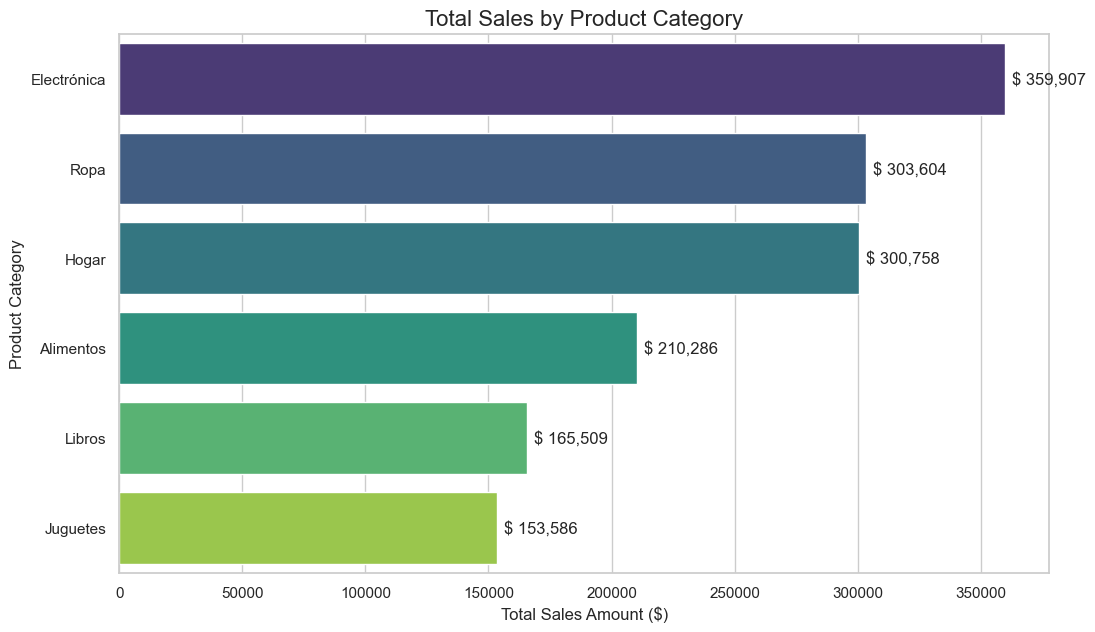

In [31]:
# Reuse the Dataframe from category sales summary
plt.figure(figsize=(12, 7)) # a larger figure for better readability
barplot_categories = sns.barplot(
    x=df_category_summary["Total Sales"],
    y=df_category_summary.index, # Use index for y-axis (categories)
    palette="viridis"
)

plt.title("Total Sales by Product Category", fontsize=16)
plt.xlabel("Total Sales Amount ($)", fontsize=12)
plt.ylabel("Product Category", fontsize=12)

for container in barplot_categories.containers:
    barplot_categories.bar_label(container, fmt="$ {:,.0f}", label_type="edge", padding=5)

plt.show()

### Visualization 2: When do our customers make purchases? (Day and Time)

We will combine a bar chart for days of the week and a line chart for hours of the day to visualize temporal purchasing patterns.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9296\3254969085.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


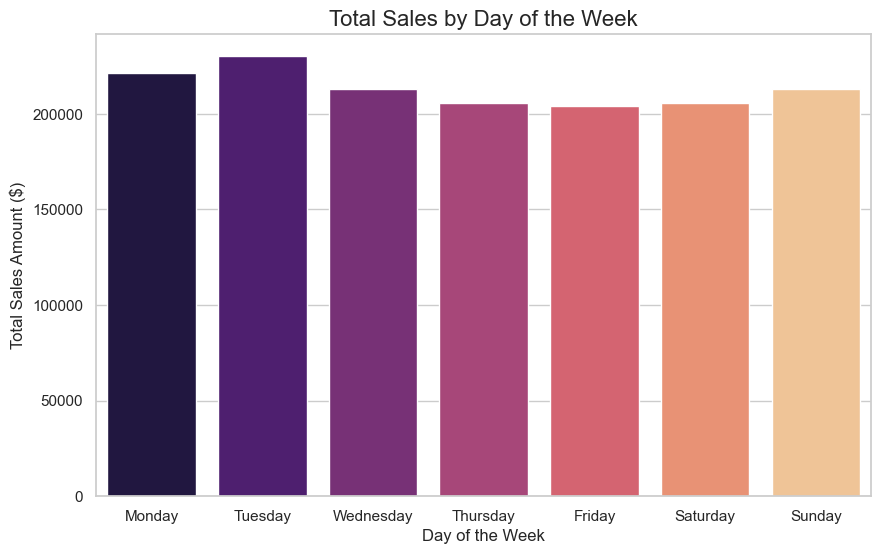

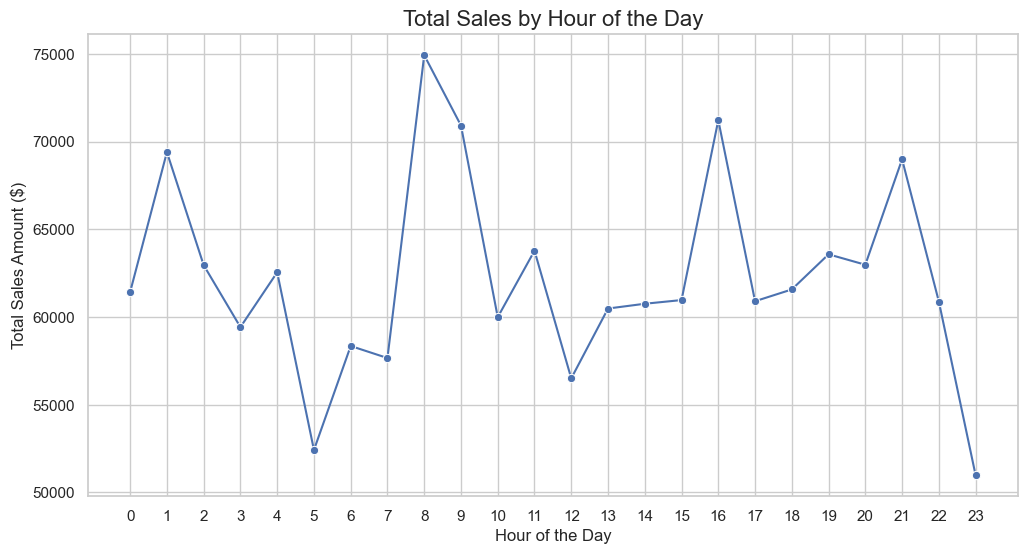

In [32]:
# Graphic 1: Sales by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(
    x=sales_by_day.index,
    y=sales_by_day.values,
    palette="magma"
)
plt.title("Total Sales by Day of the Week", fontsize=16)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Total Sales Amount ($)", fontsize=12)
plt.show()

# Graphic 2: Sales by hour of the day
plt.figure(figsize=(12, 6))
sns.lineplot(
    x=sales_by_hour.index,
    y=sales_by_hour.values,
    marker="o",
    color="b"
)
plt.title("Total Sales by Hour of the Day", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Total Sales Amount ($)", fontsize=12)
plt.xticks(range(0, 24)) # Ensure all hours are shown
plt.grid(True)
plt.show()

### Custom Metric: Average Ticket Value by City

The **Average Ticket Value (ATV)** is a key metric that indicates how much, on average, a customer spends per transaction.  
It helps answer questions such as: Do customers in **Bogotá** spend more per purchase than those in **Cartagena**?


Transactions by city with average ticket:
              count        mean        sum  ticket_promedio
ciudad                                                     
Bogotá         2021  306.571024  619580.04           306.57
Medellín       1218  298.256798  363276.78           298.26
Cali            765  294.070078  224963.61           294.07
Barranquilla    476  287.074391  136647.41           287.07
Cartagena       520  286.887019  149181.25           286.89


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9296\1870739817.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


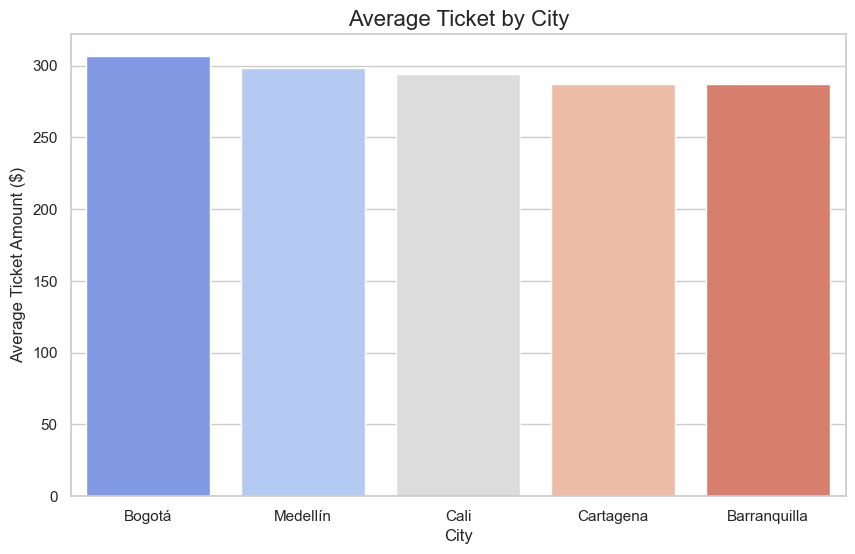

In [33]:
# Reuse the Dataframe 'transactions_by_city'
transactions_by_city["ticket_promedio"] = (transactions_by_city["sum"] / transactions_by_city["count"]).round(2)

print("Transactions by city with average ticket:")
print(transactions_by_city.sort_values(by="ticket_promedio", ascending=False))

# Visualize average ticket by city
plt.figure(figsize=(10, 6))
sns.barplot(
    x=transactions_by_city.index,
    y=transactions_by_city["ticket_promedio"],
    palette="coolwarm"
)
plt.title("Average Ticket by City", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Average Ticket Amount ($)", fontsize=12)
plt.show()


### Creating an Exportable Mini-Dashboard

For executive presentations, it is often useful to combine the most important charts into a single, consolidated image.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9296\1925722327.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9296\1925722327.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9296\1925722327.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


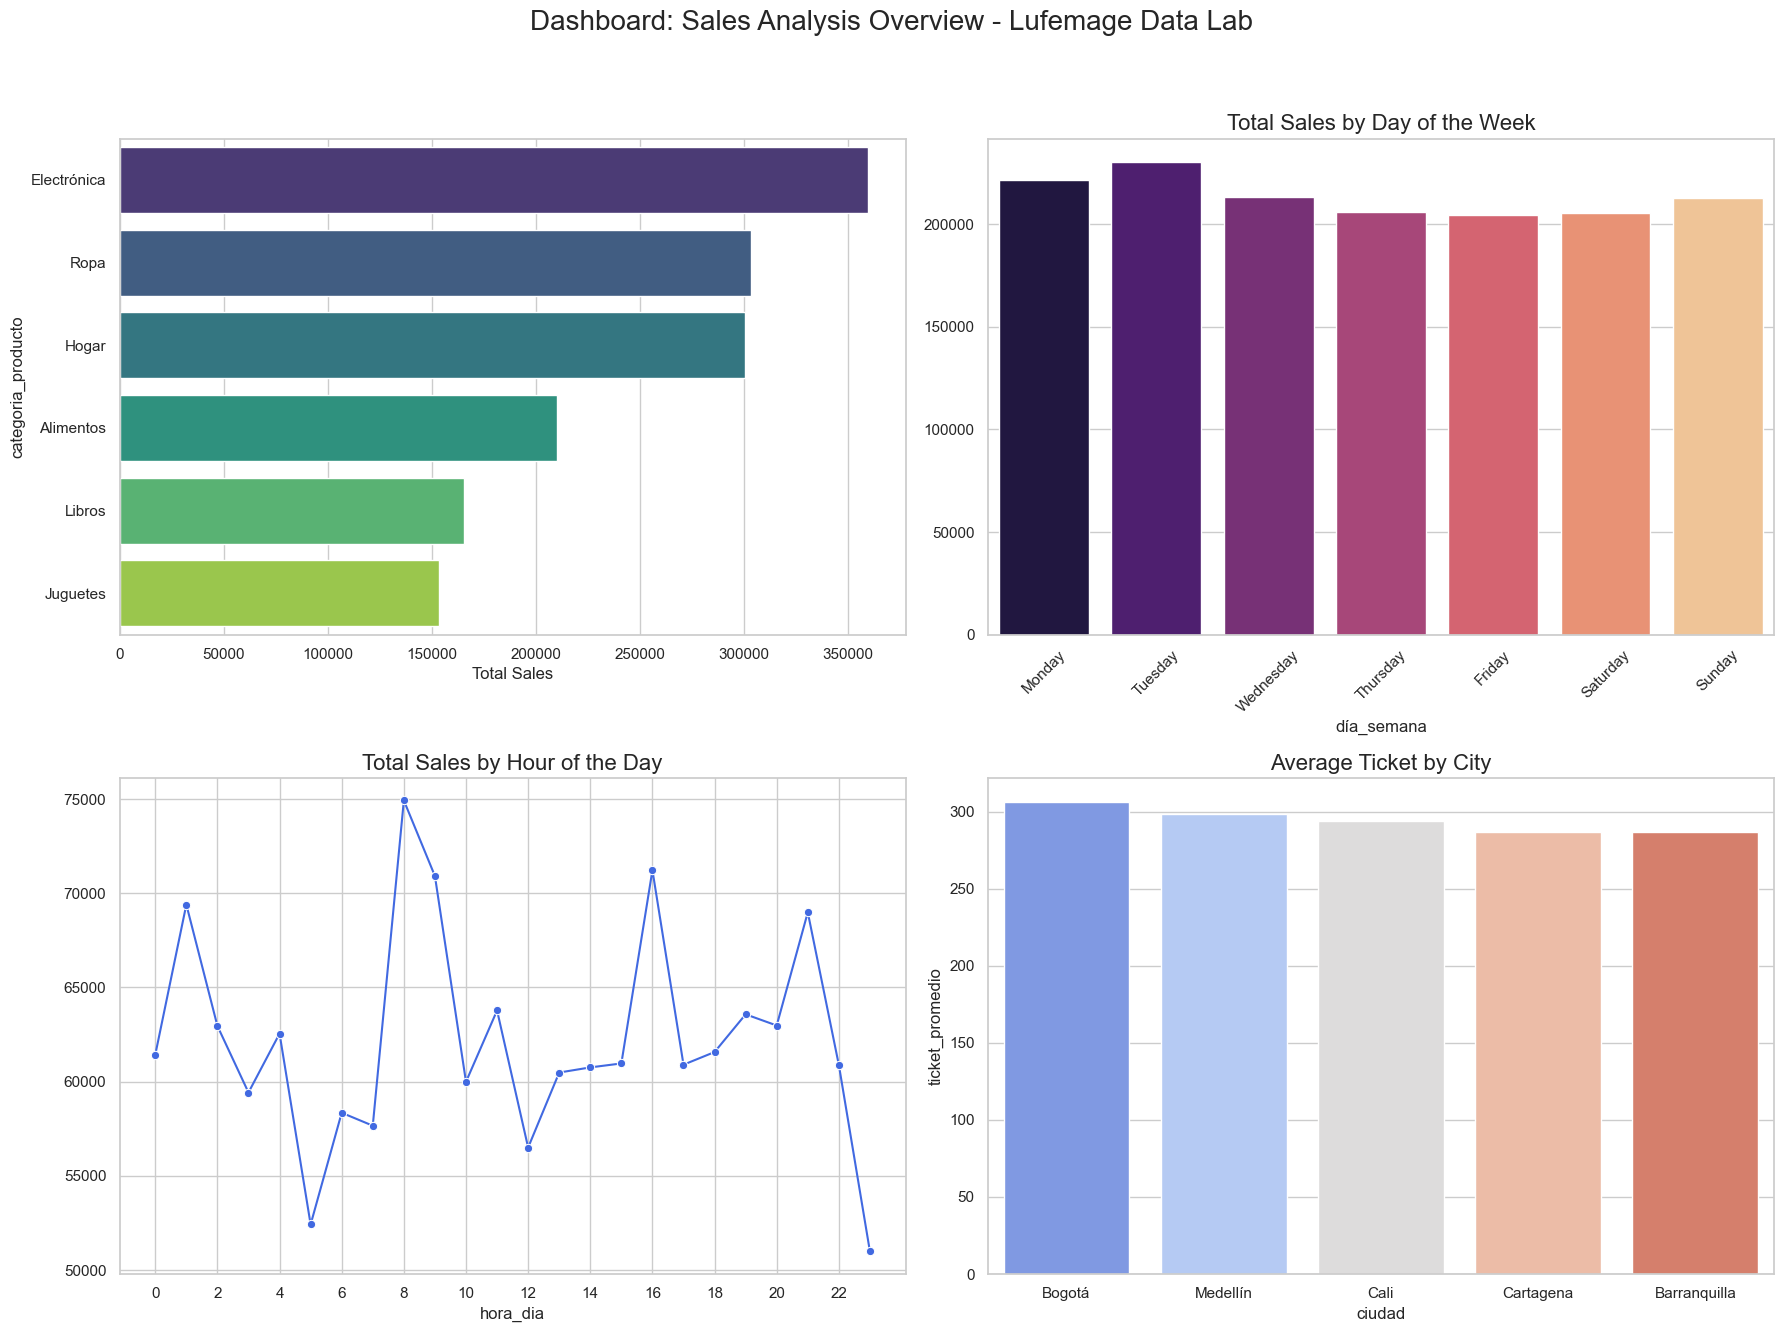

Dashboard saved as 'sales_analysis_dashboard.png' in the reports/figures directory.


In [ ]:
# Create a figure with four subplots (2x2) 
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle("Dashboard: Sales Analysis Overview - Lufemage Data Lab", fontsize=20)

# Subplot 1: Sales by Product Category (Top-left)
sns.barplot(
    ax=axes[0, 0],
    x=df_category_summary["Total Sales"],
    y=df_category_summary.index, # Use index for y-axis (categories)
    palette="viridis"
)

# Subplot 2: Sales by Day of the Week (Top-right)
sns.barplot(
    ax=axes[0, 1],
    x=sales_by_day.index,
    y=sales_by_day.values,
    palette="magma"
)
axes[0, 1].set_title("Total Sales by Day of the Week", fontsize=16)
axes[0, 1].tick_params(axis='x', rotation=45)

# Subplot 3: Sales by Hour of the Day (Bottom-left)
sns.lineplot(
    ax=axes[1, 0],
    x=sales_by_hour.index,
    y=sales_by_hour.values,
    marker="o",
    color="royalblue"
)
axes[1, 0].set_title("Total Sales by Hour of the Day", fontsize=16)
axes[1, 0].set_xticks(range(0, 24, 2)) # Show every 2 hours

# Subplot 4: Average Ticket by City (Bottom-right)
sns.barplot(
    ax=axes[1, 1],
    x=transactions_by_city.index,
    y=transactions_by_city["ticket_promedio"],
    palette="coolwarm"
)
axes[1, 1].set_title("Average Ticket by City", fontsize=16)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Leave space for the main title

# Ensure the directory exists before saving
os.makedirs("../data/figures", exist_ok=True)

# Save the dashboard as an image file
fig.savefig("../data/figures/sales_analysis_dashboard.png", dpi=300)

plt.show()

if os.path.exists("../data/figures/sales_analysis_dashboard.png"):
    print("Dashboard saved as 'sales_analysis_dashboard.png' in the data/figures directory.")